<a href="https://colab.research.google.com/github/SujalS7/Diabetes-Prediction/blob/main/Diapred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import pickle

Importing dataset and data exploration.

In [33]:


df = pd.read_csv('/content/diabetes.zip')
display(df.head())
display(df.info())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


None

 Distribution of the 'Outcome' variable, which indicates whether a patient has diabetes or not.

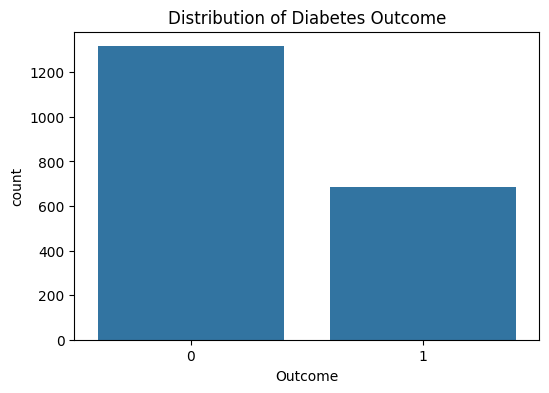

In [34]:


plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Diabetes Outcome')
plt.show()

Let's also look at the distribution of some key features.

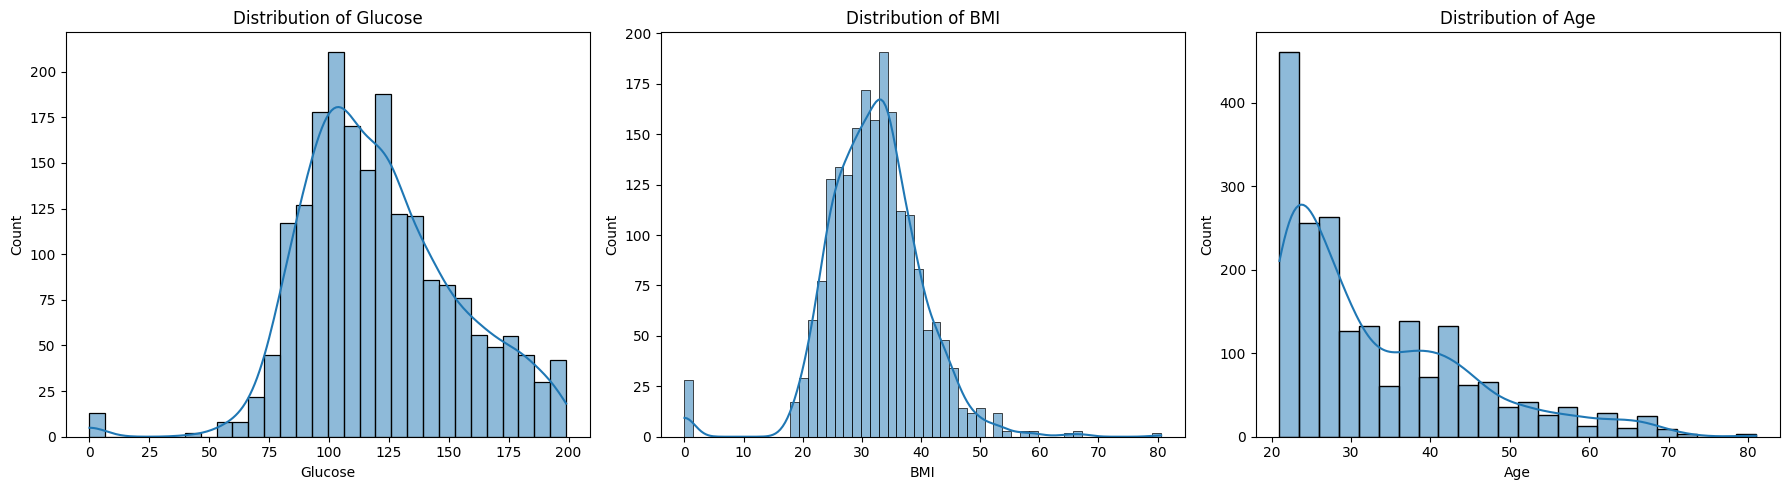

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['Glucose'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Glucose')

sns.histplot(df['BMI'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of BMI')

sns.histplot(df['Age'], kde=True, ax=axes[2])
axes[2].set_title('Distribution of Age')

plt.tight_layout()
plt.show()

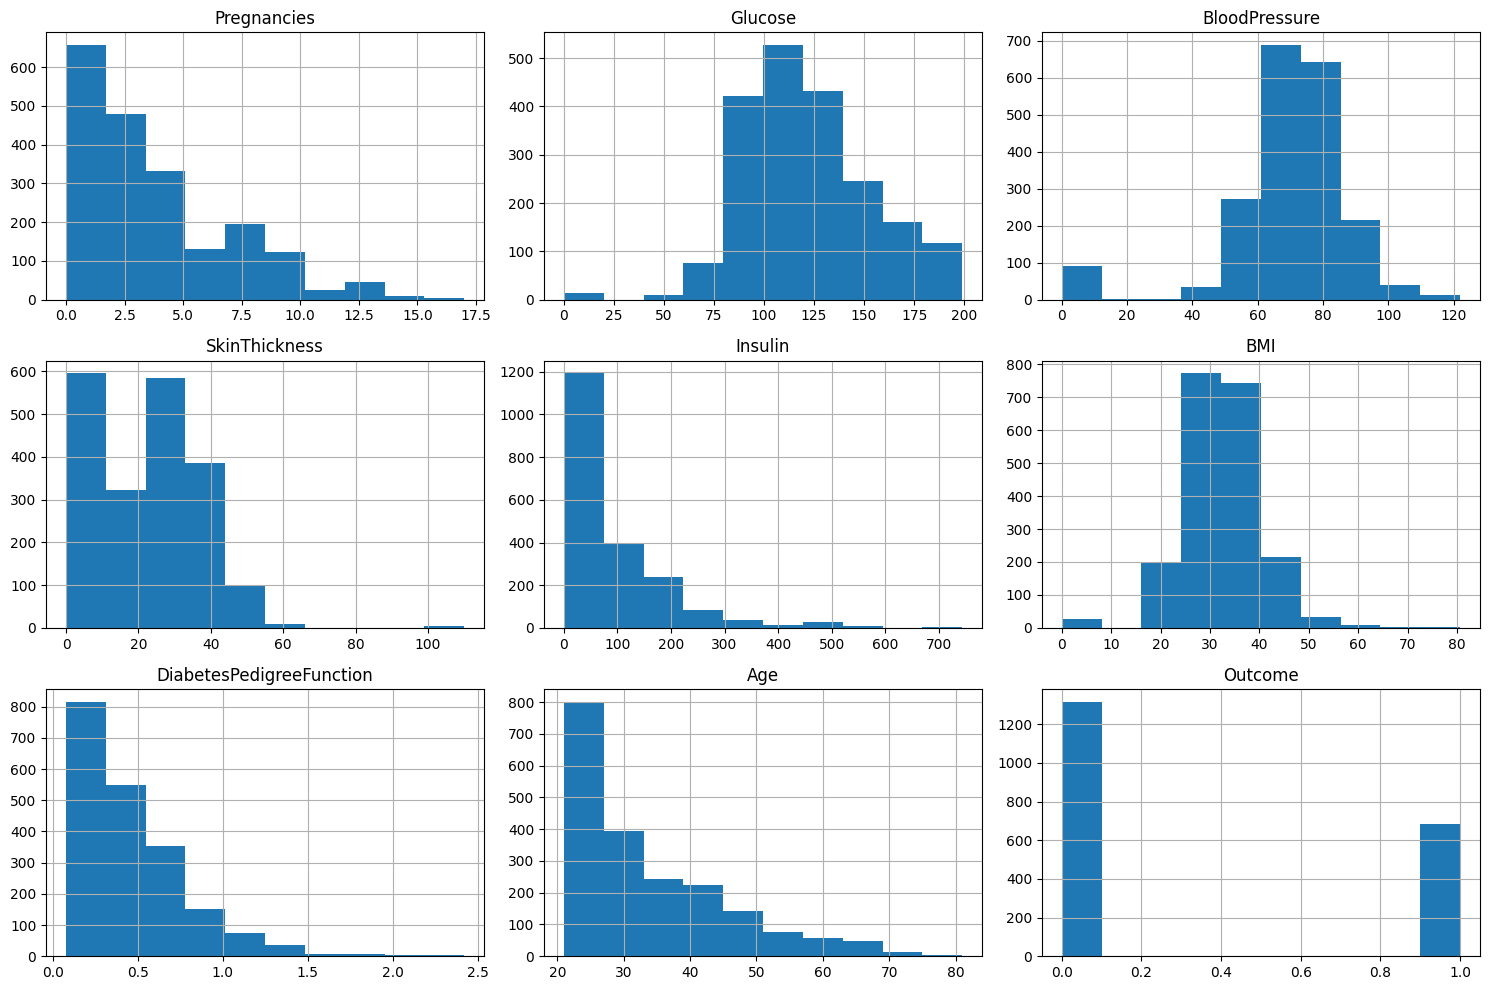

In [36]:
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

Check for null values in the DataFrame.

In [37]:
display(df.isnull().sum())

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Splitting the dataset into training and testing set (80-20 split)

In [38]:


X = df.drop(columns='Outcome')
Y = df['Outcome']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (1600, 8), X_test size: (400, 8)


Scale the features using `StandardScaler`.

In [39]:


scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

X_train_scaled shape: (1600, 8)
X_test_scaled shape: (400, 8)


Now, let's train the Decision Tree model.

In [40]:

# Train Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train_scaled, Y_train)

# Evaluate Decision Tree Model
Y_pred_dt = dt_model.predict(X_test_scaled)

print("Decision Tree Model Evaluation:")
print("Accuracy:", accuracy_score(Y_test, Y_pred_dt))
print("Precision:", precision_score(Y_test, Y_pred_dt))
print("Recall:", recall_score(Y_test, Y_pred_dt))
print("F1-score:", f1_score(Y_test, Y_pred_dt))
print("ROC AUC Score:", roc_auc_score(Y_test, Y_pred_dt))

Decision Tree Model Evaluation:
Accuracy: 0.9825
Precision: 0.9618320610687023
Recall: 0.984375
F1-score: 0.972972972972973
ROC AUC Score: 0.9829963235294117


Next, let's train the SVM model.

In [41]:


# Train SVM Model
svm_model = SVC(probability=True, random_state=0) # probability=True for ROC AUC score
svm_model.fit(X_train_scaled, Y_train)

# Evaluate SVM Model
Y_pred_svm = svm_model.predict(X_test_scaled)

print("\nSVM Model Evaluation:")
print("Accuracy:", accuracy_score(Y_test, Y_pred_svm))
print("Precision:", precision_score(Y_test, Y_pred_svm))
print("Recall:", recall_score(Y_test, Y_pred_svm))
print("F1-score:", f1_score(Y_test, Y_pred_svm))
print("ROC AUC Score:", roc_auc_score(Y_test, Y_pred_svm))


SVM Model Evaluation:
Accuracy: 0.815
Precision: 0.78125
Recall: 0.5859375
F1-score: 0.6696428571428571
ROC AUC Score: 0.7543658088235294


Finally, let's train the Random Forest model.

In [42]:


# Train Random Forest Model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train_scaled, Y_train)

# Evaluate Random Forest Model
Y_pred_rf = rf_model.predict(X_test_scaled)

print("\nRandom Forest Model Evaluation:")
print("Accuracy:", accuracy_score(Y_test, Y_pred_rf))
print("Precision:", precision_score(Y_test, Y_pred_rf))
print("Recall:", recall_score(Y_test, Y_pred_rf))
print("F1-score:", f1_score(Y_test, Y_pred_rf))
print("ROC AUC Score:", roc_auc_score(Y_test, Y_pred_rf))


Random Forest Model Evaluation:
Accuracy: 0.995
Precision: 1.0
Recall: 0.984375
F1-score: 0.9921259842519685
ROC AUC Score: 0.9921875


Let's compare the performance metrics.

In [43]:
results = {
    'Decision Tree': {
        'Accuracy': accuracy_score(Y_test, Y_pred_dt),
        'Precision': precision_score(Y_test, Y_pred_dt),
        'Recall': recall_score(Y_test, Y_pred_dt),
        'F1-score': f1_score(Y_test, Y_pred_dt),
        'ROC AUC Score': roc_auc_score(Y_test, Y_pred_dt)
    },
    'SVM': {
        'Accuracy': accuracy_score(Y_test, Y_pred_svm),
        'Precision': precision_score(Y_test, Y_pred_svm),
        'Recall': recall_score(Y_test, Y_pred_svm),
        'F1-score': f1_score(Y_test, Y_pred_svm),
        'ROC AUC Score': roc_auc_score(Y_test, Y_pred_svm)
    },
    'Random Forest': {
        'Accuracy': accuracy_score(Y_test, Y_pred_rf),
        'Precision': precision_score(Y_test, Y_pred_rf),
        'Recall': recall_score(Y_test, Y_pred_rf),
        'F1-score': f1_score(Y_test, Y_pred_rf),
        'ROC AUC Score': roc_auc_score(Y_test, Y_pred_rf)
    }
}

results_df = pd.DataFrame(results).T
display(results_df)

,Accuracy,Precision,Recall,F1-score,ROC AUC Score
Decision Tree,0.9825,0.961832,0.984375,0.972973,0.982996
SVM,0.8150,0.781250,0.585938,0.669643,0.754366
Random Forest,0.9950,1.000000,0.984375,0.992126,0.992188


Let's visualize the performance of each model using confusion matrices.

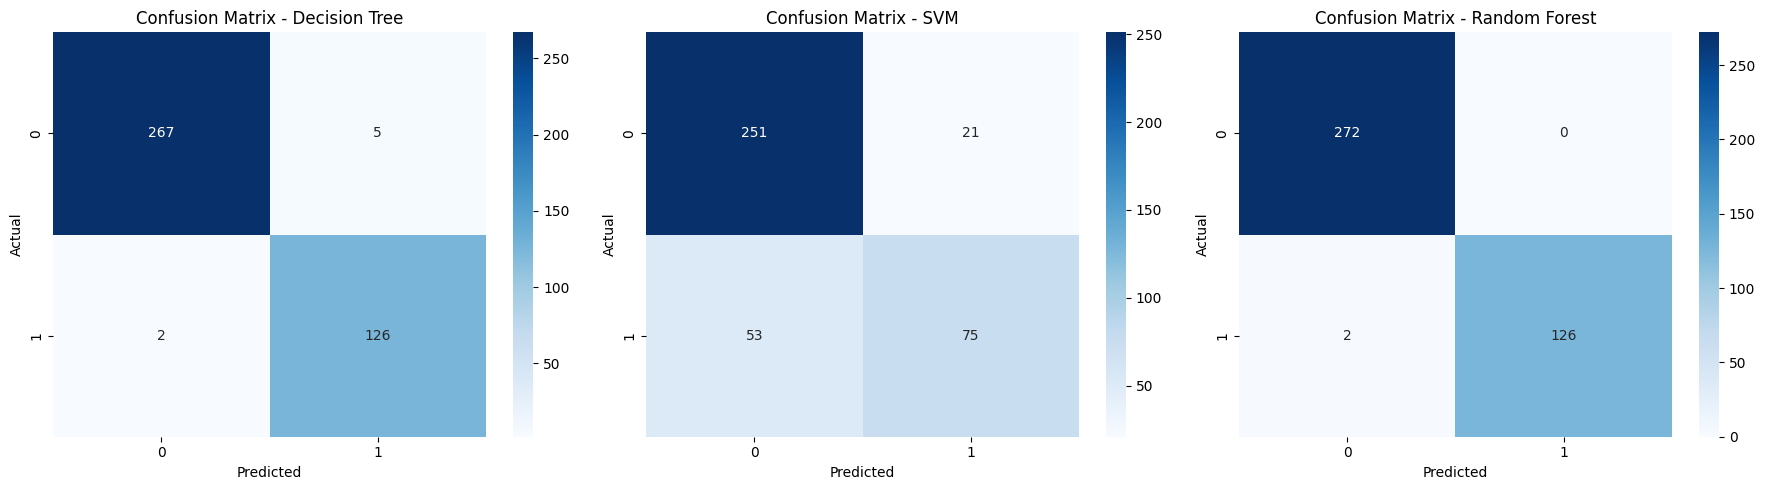

In [44]:


fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(Y_test, Y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Decision Tree')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Confusion Matrix for SVM
cm_svm = confusion_matrix(Y_test, Y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix - SVM')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(Y_test, Y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Confusion Matrix - Random Forest')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()

Generate roc curves


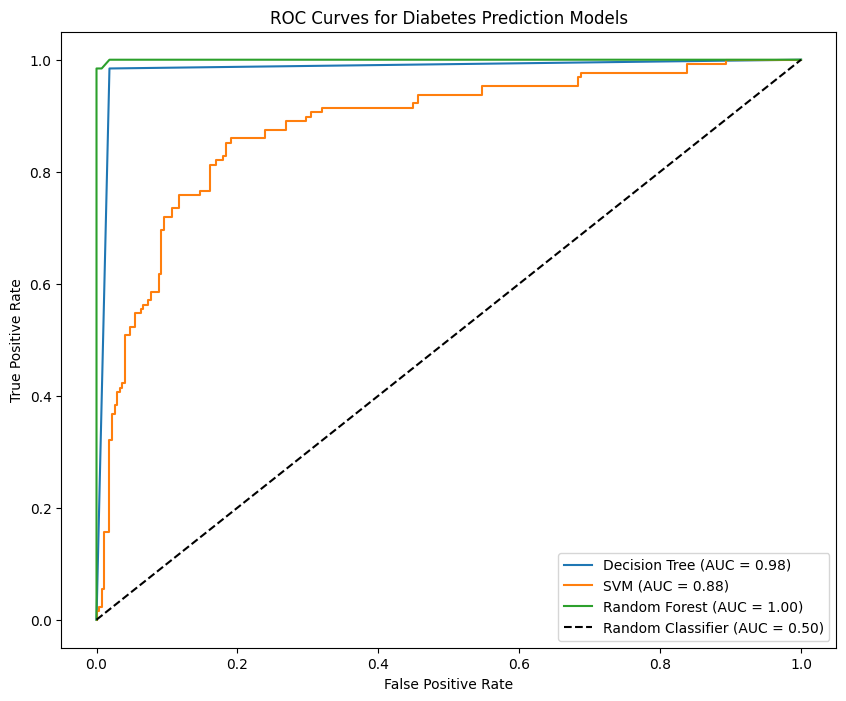

In [45]:


# Calculate predicted probabilities for the positive class
Y_prob_dt = dt_model.predict_proba(X_test_scaled)[:, 1]
Y_prob_svm = svm_model.predict_proba(X_test_scaled)[:, 1]
Y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Calculate FPR, TPR, and thresholds
fpr_dt, tpr_dt, thresholds_dt = roc_curve(Y_test, Y_prob_dt)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(Y_test, Y_prob_svm)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, Y_prob_rf)

# Calculate AUC
auc_dt = auc(fpr_dt, tpr_dt)
auc_svm = auc(fpr_svm, tpr_svm)
auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')

# Plot baseline
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Diabetes Prediction Models')
plt.legend()
plt.show()

save the trained models.

In [46]:


# Save Decision Tree model
with open('decision_tree_model.pkl', 'wb') as f:
    pickle.dump(dt_model, f)
print("Decision Tree model saved to decision_tree_model.pkl")

# Save SVM model
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)
print("SVM model saved to svm_model.pkl")

# Save Random Forest model
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)
print("Random Forest model saved to random_forest_model.pkl")

Decision Tree model saved to decision_tree_model.pkl
SVM model saved to svm_model.pkl
Random Forest model saved to random_forest_model.pkl


Let's load the saved models and test them on a sample data point.

In [51]:
# Load the saved models
with open('decision_tree_model.pkl', 'rb') as f:
    loaded_dt_model = pickle.load(f)

with open('svm_model.pkl', 'rb') as f:
    loaded_svm_model = pickle.load(f)

with open('random_forest_model.pkl', 'rb') as f:
    loaded_rf_model = pickle.load(f)

print("Models loaded successfully.")


# 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'
sample_data = np.array([[0, 138, 62, 35, 0, 33, 0.127, 47]])

# Convert the sample data to a pandas DataFrame
sample_df = pd.DataFrame(sample_data, columns=X_train.columns)

# Scale the sample data using the same scaler fitted on the training data
sample_scaled = scaler.transform(sample_df)

# Make predictions using each loaded model
dt_prediction = loaded_dt_model.predict(sample_scaled)
svm_prediction = loaded_svm_model.predict(sample_scaled)
rf_prediction = loaded_rf_model.predict(sample_scaled)

# Interpret the predictions
def interpret_prediction(prediction):
    return "Diabetic" if prediction[0] == 1 else "Non-Diabetic"

print("\nPredictions for the sample data:")
print(f"Decision Tree Prediction: {interpret_prediction(dt_prediction)}")
print(f"SVM Prediction: {interpret_prediction(svm_prediction)}")
print(f"Random Forest Prediction: {interpret_prediction(rf_prediction)}")

Models loaded successfully.

Predictions for the sample data:
Decision Tree Prediction: Diabetic
SVM Prediction: Diabetic
Random Forest Prediction: Diabetic
